<a href="https://colab.research.google.com/github/INCREDIBLE-AURNOB/NLP/blob/main/Text_classification_bag_of_words_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the data

In [1]:
! ls .

sample_data


In [2]:
import os

In [3]:
IS_KAGGLE = 'KAGGLE_KERNEL_RUN_TYPE' in os.environ

In [4]:
if IS_KAGGLE:
    data_dir = '../input/quora-insincere-questions-classification'
    train_fname = data_dir + '/train.csv'
    test_fname = data_dir + '/test.csv'
    sample_fname = data_dir + '/sample_submission.csv'
else:
    os.environ['KAGGLE_CONFIG_DIR'] = '.'
    !kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
    !kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data
    train_fname = 'data/train.csv.zip'
    test_fname = 'data/test.csv.zip'
    sample_fname = 'data/sample_submission.csv.zip' 

 75% 41.0M/54.9M [00:00<00:00, 102MB/s] 
100% 54.9M/54.9M [00:00<00:00, 110MB/s]
 57% 9.00M/15.8M [00:00<00:00, 23.1MB/s]
100% 15.8M/15.8M [00:00<00:00, 39.1MB/s]
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 70.1MB/s]


## Explore the dataset

In [5]:
import pandas as pd

In [6]:
raw_df=pd.read_csv(train_fname)

In [7]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [8]:
sincere_df=raw_df[raw_df.target==0]
insincere_df=raw_df[raw_df.target==1]


In [10]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [12]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [13]:
raw_df.target.value_counts(normalize=True)

0    0.93813
1    0.06187
Name: target, dtype: float64

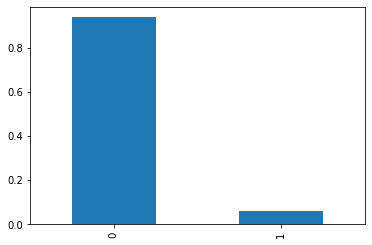

In [14]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [15]:
test_df=pd.read_csv(test_fname)
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [16]:
sub_df=pd.read_csv(sample_fname)
sub_df.head()

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0


In [17]:
sub_df.prediction.value_counts()

0    375806
Name: prediction, dtype: int64

## Creating Working Sample

In [18]:
if IS_KAGGLE:
    SAMPLE_SIZE = len(raw_df)
else:
    SAMPLE_SIZE = 100_000

In [19]:
sample_df=raw_df.sample(SAMPLE_SIZE,random_state=42)

In [20]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


## Text Preprocessing Techniques

Outline:

1. Understand the bag of words model
2. Tokenization
3. Stop word removal
4. Stemming

### Bag of Words Intuition

1. Create a list of all the words across all the text documents
2. You convert each document into vector counts of each word


Limitations:
1. There may be too many words in the dataset
2. Some words may occur too frequently
3. Some words may occur very rarely or only once
4. A single word may have many forms (go, gone, going or bird vs. birds)

In [21]:
q0=sincere_df.question_text.values[1]

In [22]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [23]:
q1=raw_df[raw_df.target==1].question_text.values[0]

## Tokenization

In [24]:
import nltk
from nltk.tokenize import word_tokenize

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [28]:
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [29]:
q0_tok=word_tokenize(q0)
q1_tok=word_tokenize(q1)

## Stop words Removal

In [30]:
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
english_stopwords=stopwords.words('english')

In [33]:
" , ".join(english_stopwords)

"i , me , my , myself , we , our , ours , ourselves , you , you're , you've , you'll , you'd , your , yours , yourself , yourselves , he , him , his , himself , she , she's , her , hers , herself , it , it's , its , itself , they , them , their , theirs , themselves , what , which , who , whom , this , that , that'll , these , those , am , is , are , was , were , be , been , being , have , has , had , having , do , does , did , doing , a , an , the , and , but , if , or , because , as , until , while , of , at , by , for , with , about , against , between , into , through , during , before , after , above , below , to , from , up , down , in , out , on , off , over , under , again , further , then , once , here , there , when , where , why , how , all , any , both , each , few , more , most , other , some , such , no , nor , not , only , own , same , so , than , too , very , s , t , can , will , just , don , don't , should , should've , now , d , ll , m , o , re , ve , y , ain , aren ,

In [34]:
def remove_stopwords(tokens):
  return [word for word in tokens if word.lower() not in english_stopwords]

In [35]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [36]:
q0_stop=remove_stopwords(q0_tok)
q0_stop

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [41]:
q1_stop=remove_stopwords(q1_tok)
q1_stop

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

## Stemming

In [37]:
from nltk.stem.snowball import SnowballStemmer

In [38]:
stemmer=SnowballStemmer(language='english')

In [39]:
stemmer.stem('going')

'go'

In [42]:
q0_stm = [stemmer.stem(word) for word in q0_stop]
q1_stm = [stemmer.stem(word) for word in q1_stop]

In [43]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

## Creating Vocabulary